# Time Series Analysis with Pandas Cont.

In hydrology and other Earth and environmental sciences, we're often interested in statistical outliers in our time series data. These often represent extreme values like floods and droughts for which we either need to be designing infrastructure (like bridges and culverts) around or developing management strategies to guard against. Below we explore some of the helpful tools that `Pandas` offers to perform time series analysis. One example involves estimating the 100-year flood in the Boise River, while the other example involves estimating a low-flow metric called the 7Q10 in the Boise River. 

Let's start by getting a relatively long (>100 years) of daily streamflow record.

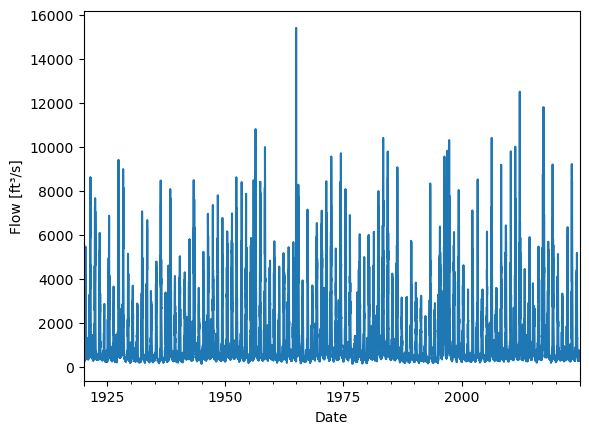

In [1]:
from dataretrieval import nwis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

startDate = '1920-01-01'
endDate = '2024-12-31'

gage = '13185000' # Boise River Near Twin Springs

BoiseRiverQ = nwis.get_dv(sites=gage, parameterCd='00060', start=startDate, end=endDate)[0]
BoiseRiverQ['00060_Mean'].plot()
plt.xlabel('Date')
plt.ylabel('Flow [ft\u00b3/s]')
plt.show()

## Annual Maximum Series for Flood Estimation

There are a number of ways to estimate the 100-year flood, but by definition it is the maximum annual daily flow that is equaled or exceeded (on average) no more than once every 100 years. We will use a relatively straightforward, non-parametric method called the Weibull plotting position formula. The Weibull plotting method involves assigning a non-exceedance probability to every annual maximum flow, based on its rank order. The Weibull probability for each annual maximum flow is calculated as:

$$
P_{NE} = \frac{r}{N + 1}
$$

where $r$ is the rank of that flow in the annual maximum series, and $N$ is the number of years in the analyzed data record. So, first we need to get the annual maximum series using the helpful `.groupby()` method:

In [2]:
BR_AnnMaxQ = BoiseRiverQ['00060_Mean'].groupby(BoiseRiverQ.index.year).max().values
BR_AnnMaxQ

array([ 5460.,  8600.,  7660.,  6080.,  2850.,  6860.,  3640.,  9400.,
        8980.,  5130.,  3680.,  2870.,  7060.,  6660.,  3440.,  4780.,
        8460.,  4600.,  8070.,  4120.,  5020.,  4290.,  5800.,  8480.,
        3580.,  5220.,  6950.,  7350.,  7790.,  6760.,  6150.,  6970.,
        8610.,  8390.,  7860.,  8480., 10800.,  8410.,  9980.,  4820.,
        5700.,  4550.,  5160.,  5430., 15400.,  8270.,  3920.,  7140.,
        3690.,  6530.,  7090.,  8430.,  9550.,  5370.,  9700.,  8070.,
        6890.,  3380.,  6020.,  4980.,  5990.,  6130.,  7980., 10400.,
        9780.,  4230.,  9060.,  3140.,  3170.,  5720.,  3820.,  3220.,
        2300.,  8330.,  2890.,  6370.,  9550., 10300.,  6120.,  8030.,
        4610.,  3510.,  7100.,  8510.,  3510.,  6140., 10400.,  3580.,
        9180.,  6420.,  9790., 10000., 12500.,  4440.,  5890.,  3790.,
        5460., 11800.,  5680.,  9190.,  5120.,  3320.,  6340.,  9210.,
        5170.])

Next, we need to sort these annual maximum streamflows:

In [3]:
BR_AnnMaxQsort = np.sort(BR_AnnMaxQ)
BR_AnnMaxQsort

array([ 2300.,  2850.,  2870.,  2890.,  3140.,  3170.,  3220.,  3320.,
        3380.,  3440.,  3510.,  3510.,  3580.,  3580.,  3640.,  3680.,
        3690.,  3790.,  3820.,  3920.,  4120.,  4230.,  4290.,  4440.,
        4550.,  4600.,  4610.,  4780.,  4820.,  4980.,  5020.,  5120.,
        5130.,  5160.,  5170.,  5220.,  5370.,  5430.,  5460.,  5460.,
        5680.,  5700.,  5720.,  5800.,  5890.,  5990.,  6020.,  6080.,
        6120.,  6130.,  6140.,  6150.,  6340.,  6370.,  6420.,  6530.,
        6660.,  6760.,  6860.,  6890.,  6950.,  6970.,  7060.,  7090.,
        7100.,  7140.,  7350.,  7660.,  7790.,  7860.,  7980.,  8030.,
        8070.,  8070.,  8270.,  8330.,  8390.,  8410.,  8430.,  8460.,
        8480.,  8480.,  8510.,  8600.,  8610.,  8980.,  9060.,  9180.,
        9190.,  9210.,  9400.,  9550.,  9550.,  9700.,  9780.,  9790.,
        9980., 10000., 10300., 10400., 10400., 10800., 11800., 12500.,
       15400.])

Now, we compute a Weibull plotting position non-exceedance probability. Note that the calculation of this probability does __not__ involve the annual maximum flow itself.  

In [4]:
BR_weibull = (np.arange(BR_AnnMaxQsort.size) + 1)/(BR_AnnMaxQsort.size + 1)
BR_weibull

array([0.00943396, 0.01886792, 0.02830189, 0.03773585, 0.04716981,
       0.05660377, 0.06603774, 0.0754717 , 0.08490566, 0.09433962,
       0.10377358, 0.11320755, 0.12264151, 0.13207547, 0.14150943,
       0.1509434 , 0.16037736, 0.16981132, 0.17924528, 0.18867925,
       0.19811321, 0.20754717, 0.21698113, 0.22641509, 0.23584906,
       0.24528302, 0.25471698, 0.26415094, 0.27358491, 0.28301887,
       0.29245283, 0.30188679, 0.31132075, 0.32075472, 0.33018868,
       0.33962264, 0.3490566 , 0.35849057, 0.36792453, 0.37735849,
       0.38679245, 0.39622642, 0.40566038, 0.41509434, 0.4245283 ,
       0.43396226, 0.44339623, 0.45283019, 0.46226415, 0.47169811,
       0.48113208, 0.49056604, 0.5       , 0.50943396, 0.51886792,
       0.52830189, 0.53773585, 0.54716981, 0.55660377, 0.56603774,
       0.5754717 , 0.58490566, 0.59433962, 0.60377358, 0.61320755,
       0.62264151, 0.63207547, 0.64150943, 0.6509434 , 0.66037736,
       0.66981132, 0.67924528, 0.68867925, 0.69811321, 0.70754

What does involve the annual maximum flows is how we plot the Weibull probabilities and the annual maximum values. Here, we plot the annual maximum values on the x-axis and the Weibull probability on the y-axis. Note we are plotting $1 - P_{NE}$, which is the __exceedance__ probability. We can then use this plot to read off, or interpolate for the value that is equalled or exceeded in only 1 out of 100 years, on average. 

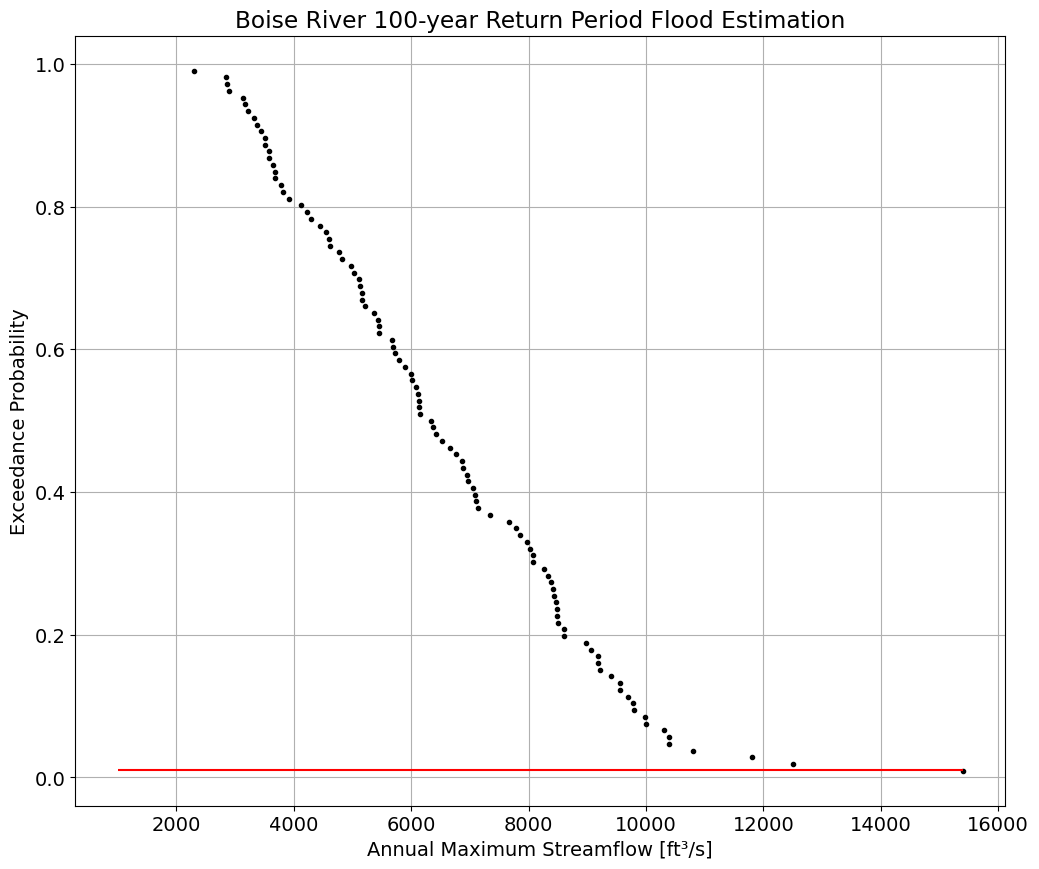

In [5]:
fig = plt.figure(figsize=(12,10))
plt.rcParams.update({'font.size': 14})
plt.plot(BR_AnnMaxQsort, 1-BR_weibull,'k.')
plt.hlines(0.01, xmin=1000, xmax=BR_AnnMaxQsort.max(), colors='r')
plt.title('Boise River 100-year Return Period Flood Estimation')
plt.xlabel('Annual Maximum Streamflow [ft\u00b3/s]')
plt.ylabel('Exceedance Probability')
plt.grid(':')
plt.show()


## Boise River 7Q10 Estimation

The so-called 7Q10 is a streamflow time series metric that is often used to assess ecological risk for aquatic ecosystems. It has been shown to correlate with the occurrence of fish kills and other negative habitat occurrences. By definition the 7Q10 is the annual minimum 7-day average flow that occurs, on average, once every 10 years. Explicitly turning this into a set of instructions that we need to perform on a time series of daily streamflow data, we need to:

1. Compute the 7-day running average streamflow,
2. Find the minimum value for every year of record,
3. Perform a frequency analysis to determine the corresponding 7-day average annual minimum that occurs once every 10 years

In practice, this only differs from the flood frequency analysis in that we're interested in: (1) annual minimums of (2) 7-day running average streamflow. For the latter point, fortunately `Pandas` offers us the `.rolling()` method.

In [8]:
BR_7dayAnnMinQ = BoiseRiverQ['00060_Mean'].rolling(window=7).mean().groupby(BoiseRiverQ.index.year).min().values
BR_7dayAnnMinQ

array([264.42857143, 376.42857143, 298.57142857, 300.        ,
       218.42857143, 271.42857143, 235.42857143, 351.57142857,
       265.14285714, 241.14285714, 224.28571429, 203.71428571,
       182.71428571, 257.85714286, 204.        , 193.14285714,
       214.42857143, 225.71428571, 330.        , 226.71428571,
       238.        , 337.28571429, 279.28571429, 320.42857143,
       198.        , 310.        , 355.14285714, 339.57142857,
       324.28571429, 284.28571429, 319.42857143, 368.28571429,
       258.57142857, 314.28571429, 272.57142857, 273.85714286,
       380.57142857, 315.71428571, 337.14285714, 350.71428571,
       222.85714286, 248.57142857, 316.71428571, 303.85714286,
       319.71428571, 214.28571429, 237.42857143, 193.57142857,
       245.71428571, 284.14285714, 287.85714286, 371.71428571,
       302.57142857, 311.42857143, 310.71428571, 281.57142857,
       258.71428571, 216.85714286, 254.28571429, 197.14285714,
       299.28571429, 279.14285714, 334.28571429, 417.28

Again, let's sort these, although it's not strictly necessary for the method we'll use. 

In [9]:
BR_7dayAnnMinQsort = np.sort(BR_7dayAnnMinQ)
BR_7dayAnnMinQsort

array([182.71428571, 193.14285714, 193.57142857, 197.14285714,
       198.        , 203.71428571, 204.        , 207.85714286,
       211.42857143, 213.57142857, 214.28571429, 214.42857143,
       216.85714286, 218.28571429, 218.42857143, 222.85714286,
       224.28571429, 225.71428571, 226.71428571, 229.        ,
       229.71428571, 234.57142857, 235.28571429, 235.42857143,
       237.14285714, 237.42857143, 238.        , 241.14285714,
       245.71428571, 246.14285714, 248.57142857, 254.14285714,
       254.28571429, 257.85714286, 258.57142857, 258.57142857,
       258.71428571, 258.85714286, 260.        , 260.57142857,
       263.42857143, 264.42857143, 264.85714286, 265.14285714,
       268.85714286, 271.42857143, 272.57142857, 273.14285714,
       273.85714286, 274.14285714, 277.        , 279.14285714,
       279.28571429, 281.57142857, 282.28571429, 282.85714286,
       283.        , 284.14285714, 284.28571429, 287.85714286,
       290.57142857, 292.57142857, 293.14285714, 293.14

Let's use a histogram to get the empirical density and cumulative density functions.

In [10]:
[count, qbins_edge] = np.histogram(BR_7dayAnnMinQsort, bins=25)

Use the histogram information to get the cumulative density function:

In [11]:
CDF_7qAnnMin = count.cumsum()/count.sum()
CDF_7qAnnMin

array([0.00952381, 0.04761905, 0.07619048, 0.14285714, 0.19047619,
       0.25714286, 0.28571429, 0.31428571, 0.41904762, 0.47619048,
       0.56190476, 0.61904762, 0.67619048, 0.7047619 , 0.79047619,
       0.83809524, 0.88571429, 0.9047619 , 0.92380952, 0.93333333,
       0.97142857, 0.98095238, 0.98095238, 0.98095238, 1.        ])

Compute the bin centers:

In [12]:
qbins_ctr = (qbins_edge[0:-1] + qbins_edge[1:])/2

Plot the result and mark the 10% non-exceedence probability. 

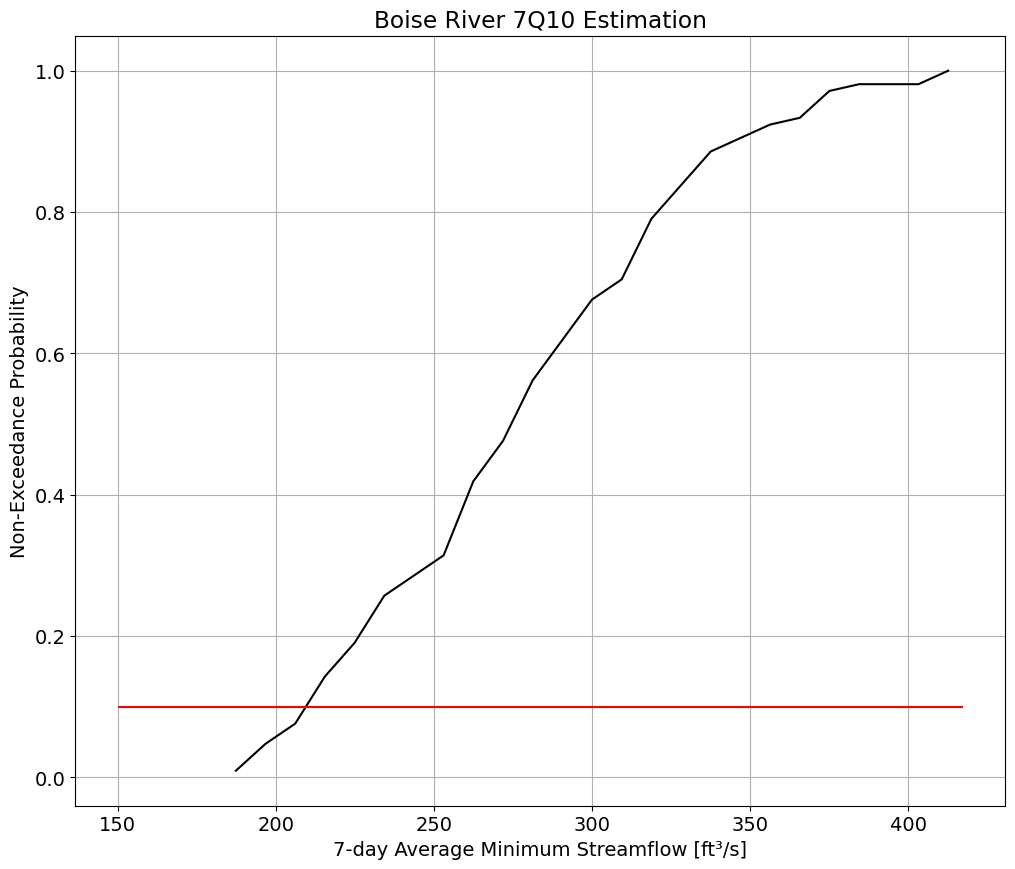

In [13]:
fig = plt.figure(figsize=(12,10))
plt.rcParams.update({'font.size': 14})
plt.plot(qbins_ctr, CDF_7qAnnMin,'k-')
plt.hlines(0.1, xmin=150, xmax=qbins_edge.max(), colors='r')
plt.title('Boise River 7Q10 Estimation')
plt.xlabel('7-day Average Minimum Streamflow [ft\u00b3/s]')
plt.ylabel('Non-Exceedance Probability')
plt.grid(':')
plt.show()